In [1]:
#pipelinesss
import pandas as pd 
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#1. IMPORT DATA
# Data Source: https://www.kaggle.com/mlg-ulb/creditcardfraud/downloads/creditcardfraud.zip/3
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
#check data for missing values
df.isnull().sum()
#Perfect !

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [4]:
# Convert data to contain only non-negative values
for col in df.columns:
    if col.startswith("V"):
        offset = df[col].min()
        df[col] = df[col] - offset

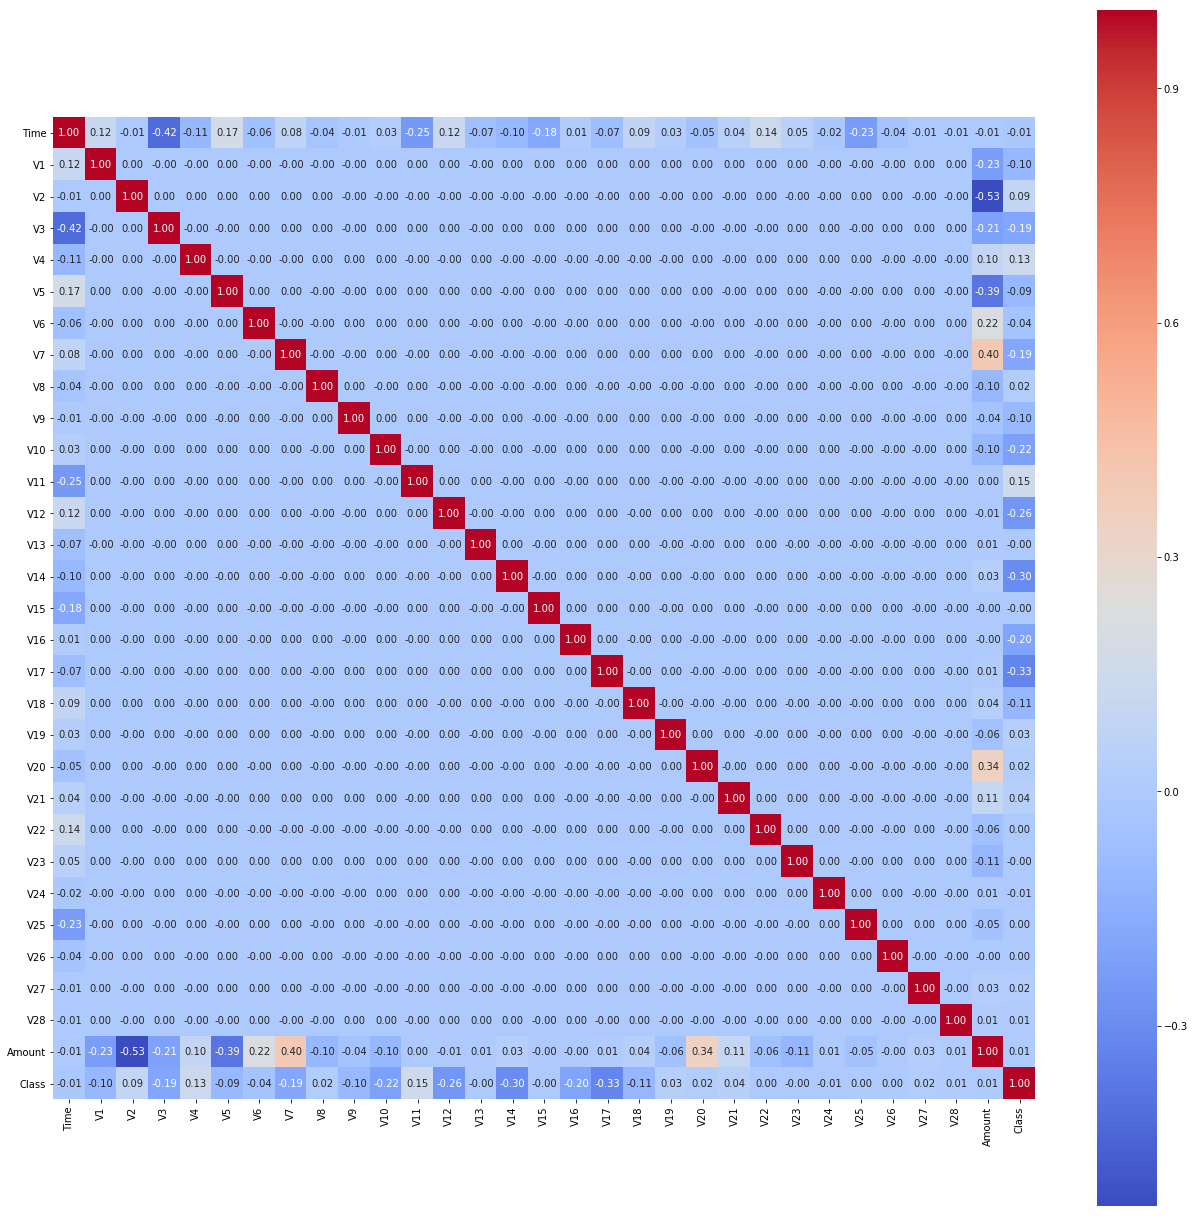

In [5]:
#lets make a correlation heatmap to remove features if they are collinear and/or 
#choose those features that correlate/vary most with the label:

plt.figure(figsize=(22,22))
sns.heatmap(df.corr(), cbar = True,  square = True,
           annot=True, fmt= '.2f',annot_kws={'size': 10},
          cmap= 'coolwarm')

In [6]:
#looks like we have no collinearity problems
#lets choose the features with the highest correlation to 'Class'
df.corr()['Class'].abs().sort_values(ascending=False)[1:10] 

V17    0.326481
V14    0.302544
V12    0.260593
V10    0.216883
V16    0.196539
V3     0.192961
V7     0.187257
V11    0.154876
V4     0.133447
Name: Class, dtype: float64

In [7]:
#2. SLICE DATA
#lets pick the top 6 features, having corrr above.19
topcols = df.corr()['Class'].abs().sort_values(ascending=False)[1:7].index
cols = [i for i in topcols]

In [8]:
X = df[cols]
label = df['Class']
topX.head()

NameError: name 'topX' is not defined

In [17]:
#3. CREATE PIPELINE

from sklearn import tree, pipeline, preprocessing
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# Initialize the Scikit-Learn pipeline
cart_model = tree.DecisionTreeClassifier()
pipe = pipeline.Pipeline(steps=[
    ("feature_selection", SelectKBest(chi2, k=4)),
    ("scale", preprocessing.StandardScaler()),  
    ("CART", cart_model)])
preprocessing.StandardScaler()



StandardScaler(copy=True, with_mean=True, with_std=True)

In [18]:
#4. TRAIN
pipe.fit(X, y=label)

Pipeline(memory=None,
     steps=[('feature_selection', SelectKBest(k=4, score_func=<function chi2 at 0x1a1b50e268>)), ('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('CART', DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
  ...      min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'))])

In [ ]:
#5. EVALUATIONs
from sklearn.model_selection import cross_val_score

# return value is array of scores
scores = cross_val_score(pipe, X, label, cv=30)
# use as quality metric the average CV score
meanCvAccuracy = scores.mean()
print("Mean CV accuracy= %f" % meanCvAccuracy)

In [14]:
#6. SAVE PIPELINE
import joblib

PIPELINEPATH = "creditcard.pipeline"
joblib.dump(pipe, PIPELINEPATH, compress = 1)



['creditcard.pipeline']

In [15]:
#7. LOAD PIPELINE
pipeline_loaded = joblib.load(PIPELINEPATH)

In [16]:
#8. CLASSIFY NEW INSTANCES 
import random

# Example of a new instance, by sampling a random record in the dataset
sample_index = random.randint(1,df.shape[0])

# Make a prediction
result = pipeline_loaded.predict([X.iloc[sample_index],])
print("Prediction: Class label is %i" % result)
print("Actual Label:", label.iloc[sample_index])

Prediction: Class label is 0
Actual Label: 0
